# Descripción del proyecto
## Contexto

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Parte 1. Priorizar hipótesis


El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una:

### Datos del archivo hypotheses_us.csv

- Hypotheses: breves descripciones de las hipótesis.
- Reach: alcance del usuario, en una escala del uno a diez.
- Impact: impacto en los usuarios, en una escala del uno al diez.
- Confidence: confianza en la hipótesis, en una escala del uno al diez.
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba

### Actividades:
1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [2]:
# Importamos las librerias
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Visualizamos la data 
hypothesis_data = pd.read_csv('Datasets/hypotheses_us.csv', sep = ';')
hypothesis_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [3]:
# Reiniciamos los índices para que el número de índice indique el número de hipótesis
hypothesis_data.reset_index(drop= True)
hypothesis_data.index = range(1, len(hypothesis_data) + 1)
hypothesis_data

,Hypothesis,Reach,Impact,Confidence,Effort
1,Add two new channels for attracting traffic. T...,3,10,8,6
2,Launch your own delivery service. This will sh...,2,5,4,10
3,Add product recommendation blocks to the store...,8,3,7,3
4,Change the category structure. This will incre...,8,3,3,8
5,Change the background color on the main page. ...,3,1,1,1
6,Add a customer review page. This will increase...,3,2,2,3
7,Show banners with current offers and sales on ...,5,3,8,3
8,Add a subscription form to all the main pages....,10,7,8,5
9,Launch a promotion that gives users discounts ...,1,9,9,5


### Conclusiones:
Para el paso de revisión de datos y limpieza vemos que todos tienen un formato correcto y lo único que hicimos fue separar los espacios donde había ';'.
Ahora podemos continuar a resolver los ejercicios.

### 1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [4]:
hypothesis_data['ICE'] = ((hypothesis_data['Impact'] * hypothesis_data['Confidence']) / hypothesis_data['Effort']).round(2)

print(hypothesis_data[['Hypothesis', 'ICE']].sort_values(by= 'ICE', ascending= False))

                                          Hypothesis    ICE
9  Launch a promotion that gives users discounts ...  16.20
1  Add two new channels for attracting traffic. T...  13.33
8  Add a subscription form to all the main pages....  11.20
7  Show banners with current offers and sales on ...   8.00
3  Add product recommendation blocks to the store...   7.00
2  Launch your own delivery service. This will sh...   2.00
6  Add a customer review page. This will increase...   1.33
4  Change the category structure. This will incre...   1.12
5  Change the background color on the main page. ...   1.00


### Conclusiones:
Las ICE presenta las hipóteisis 9, 1 y 8 como las más prometedoras.

### 2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [5]:
hypothesis_data['RISE'] = (hypothesis_data['Reach'] * hypothesis_data['Impact'] * hypothesis_data['Confidence']) / hypothesis_data['Effort']

print(hypothesis_data[['Hypothesis', 'RISE']].sort_values(by= 'RISE', ascending= False))

                                          Hypothesis   RISE
8  Add a subscription form to all the main pages....  112.0
3  Add product recommendation blocks to the store...   56.0
1  Add two new channels for attracting traffic. T...   40.0
7  Show banners with current offers and sales on ...   40.0
9  Launch a promotion that gives users discounts ...   16.2
4  Change the category structure. This will incre...    9.0
2  Launch your own delivery service. This will sh...    4.0
6  Add a customer review page. This will increase...    4.0
5  Change the background color on the main page. ...    3.0


### Conclusión 
El RICE nos arroja un resultado un poco diferente, nos dice que las hipótesis más prometedoras son la 8, 3 y 1.

### 3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [6]:
hypothesis_data

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RISE
1,Add two new channels for attracting traffic. T...,3,10,8,6,13.33,40.0
2,Launch your own delivery service. This will sh...,2,5,4,10,2.00,4.0
3,Add product recommendation blocks to the store...,8,3,7,3,7.00,56.0
4,Change the category structure. This will incre...,8,3,3,8,1.12,9.0
5,Change the background color on the main page. ...,3,1,1,1,1.00,3.0
6,Add a customer review page. This will increase...,3,2,2,3,1.33,4.0
7,Show banners with current offers and sales on ...,5,3,8,3,8.00,40.0
8,Add a subscription form to all the main pages....,10,7,8,5,11.20,112.0
9,Launch a promotion that gives users discounts ...,1,9,9,5,16.20,16.2


### Conclusión:
Al utilizar RISE podemos obtener una decisión más estratégica, más detallada y precisa, aunqué toma más tiempo realizarla porque utiliza 4 parámetros (Alcance, Impacto, Confianza y Esfuerzo) en vez de 3 (Impacto, Confianza y Esfuerzo) como ICE, eso la hace más confiable. 
Entonces, si tenemos el tiempo y los recuersos para realizar RICE es la mejor opción para priorizar las hipótesis, si queremos rápidez es mejor utilizar ICE.

# Parte 2. Análisis del test A/B

Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

### Datos del archivo orders_us.csv:

- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.

### Datos del archivo visits_us.csv:

- date: la fecha.
- group: grupo de la prueba A/B.
- visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

### Actividades:
1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Iniciaremos revisando los datos y haciendo las modificaciones si es necesario.

In [7]:
# Importamos los archivos a dos Datasets, lo cuales llamaremos 'orders' y 'visits'
orders = pd.read_csv('Datasets/orders_us.csv', sep= ',')
visits = pd.read_csv('Datasets/visits_us.csv', sep= ',')

# Revisamos los tipos de datos 
print(orders.info())
print("----------------------------------------------")
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


### Conclusuiones:
No tenemos valores ausentes ni errores en el tipo de datos, solo cambiaremos el formato de fecha a formato date para ambos DataFrames

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
print(orders.head())
print()
print(visits.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


#### Para poder trazar gráficos, debemos hacer unos pasos prévios que consisten en recopilar datos acumulados. 
Esto nos ayudará a contestar los 4 primeros puntos.

In [18]:
# Cramos el DataFrame y eliminamos duplicados
datesGroups = orders[['date', 'group']].drop_duplicates()

# Declaramos la variable ordersAggregated para almacenar algunos datos que ordenaremos por date y group
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',   # Fecha
    'group' : 'max',   # Gurpos de prueba A/B 
    'transactionId' : pd.Series.nunique,   # El número de pedidos distintos para el grupo de prueba hasta la fecha especificada incluida
    'visitorId' : pd.Series.nunique,   # El número de usuarios distintos en el grupo de prueba que realizan al menos un pedido hasta la fecha especificada incluida
    'revenue' : 'sum'}), # Los ingresos totales de pedidos en el grupo de prueba hasta la fecha especificada incluida
    axis=1).sort_values(by=['date','group'])

# Declaramos la variable visitorsAggregated para almacenar algunos datos y también ordenaremos por date y group
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
    'date' : 'max',   # Fecha
    'group' : 'max',   # Gurpos de prueba A/B             
    'visits' : 'sum'}),   # El número de pedidos distintos para el grupo de prueba hasta la fecha especificada incluida
    axis=1).sort_values(by=['date','group'])

# Definimos una nueva variable para unir las dos anteriores la cual llamaremos cumulativeData
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Asignamos nombres a las columnas de cumulativeData
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845


In [20]:
# Creamos dos nuevas variables para cada uno de los grupos
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] 

### 1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

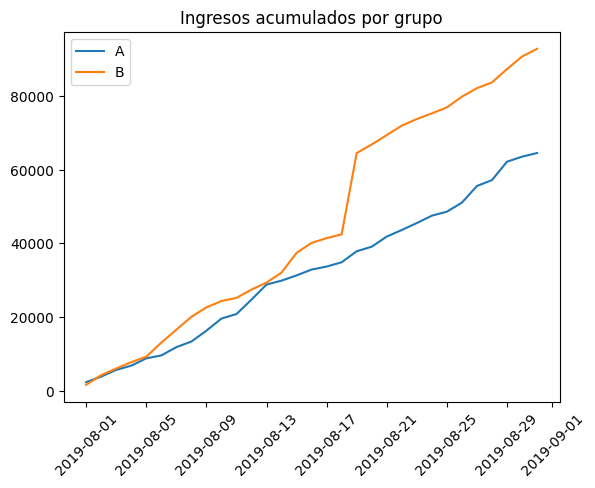

In [30]:
# Gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Ingresos acumulados por grupo')
plt.xticks(rotation= 45)
plt.legend()

### Conclusiones:
El segmento B tomo la delantera a los pocos días de haber iniciado la prueba (la cuál ya no perdió), debemos notar que a partir de la fecha 2019-08-17 y antes del 2019-08-21 tiene un repunte el segmento B y una separación considerable del segmento A, esa brecha se mantiene por el resto del tiempo que dura la prueba, sería interesante descubrir que sucedió ese día.

### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

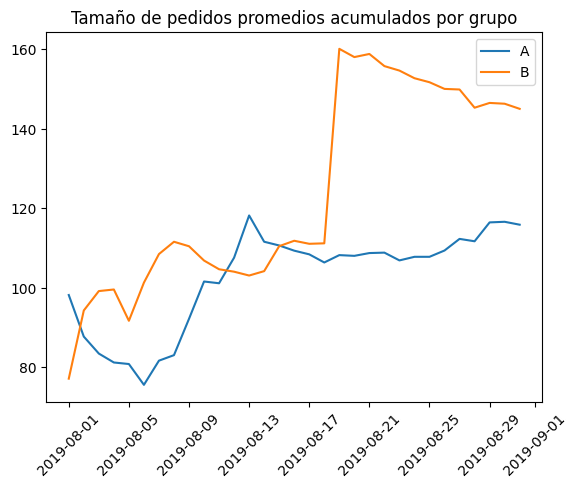

In [29]:
# Gráfico de pedidos acumulados de grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Gráfico de pedidos acumulados de grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Tamaño de pedidos promedios acumulados por grupo')
plt.xticks(rotation= 45)
plt.legend()

### Conclusiones:
El valor acumulado de los tamaños promedio de pedidos sigue fluctuando, esto no ayuda a tomar decisiones certeras con esta métrica, sin embargo, podemos notar que al igual que en las gráficas de ingresos durante la fecha de 2019-08-17 y  2019-08-21 tiene un repunte considerable de pedidos promedios el cual mantiene y hace congruencia con la gráfica de ingresos promedios. 

### 3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

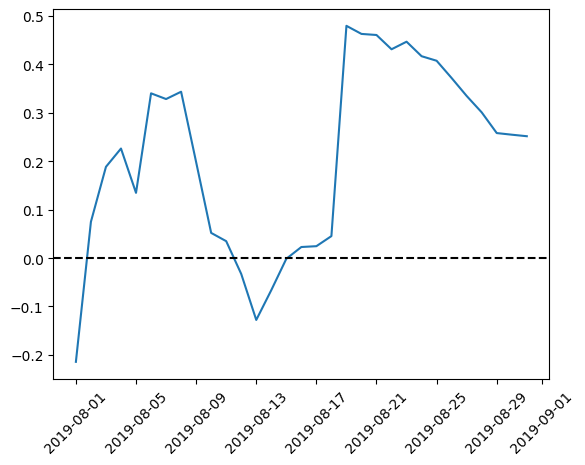

In [28]:
# Guardamos todos los datos en un nuevo DF llamándolo mergeCumulativeRevenue
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Calculamos la diferencia relativa y la graficamos
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation= 45)
plt.axhline(y=0, color='black', linestyle='--')


### Conclusiones:
Podemos ver que el grupo B inició con una diferencia negativa del 20%, dentro de los primeros días logró posicionarse en un 20% positivo respecto al grupo A, sin embargo en la fecha del 2019-08-13 bajo a un -10% (Es un cambio repentino considerable. Tal vez tuvo que ser alguna compra anormalmente grande) para luego subir en los días posteriores hasta casi un 50% arriba del grupo A. 

### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

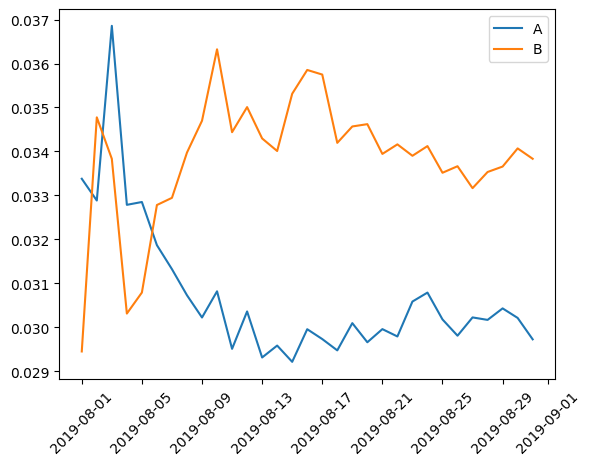

In [32]:
# Agreamos una columna que contenga la relación entre los pedidos y el numero de visitas (conversión acumulada)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Seleccionamos datos de los pedidos en los segmentos A y B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation= 45)
plt.legend()

### Conclusiones:
Al inicio de la prueba, el segmento A tenía una tasa de conversión más alta, pero el segmento B ganó a los pocos días, sin embargo, aún fluctuan demasiado, lo que nos dice que la tasa de conversión no se ha fijado a su valor promedio.